# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- The link where the data was downloaded is: http://insideairbnb.com/get-the-data/. 
- This dataset is specifically the listings in NYC. 
- The data columns can be explained when clicking on this link https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing. 
- Data used in this project was scraped on December 15, 2022.

# Loading and Preparing Datasets

In [4]:
# Dropping all of the columns which we will not use
listingsNYC= pd.read_csv('listings.csv')

# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
df = listingsNYC.copy(deep=True)
listingsNYC.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
count,4.153300e+04,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,32140.000000,41533.000000,41533.000000,41533.000000,4.153300e+04
mean,1.728318e+17,40.728292,-73.944526,221.978282,18.592204,26.204994,1.279287,20.626803,143.287771,7.983700,3.313718e+03
std,2.974371e+17,0.057145,0.055965,919.502236,30.699921,56.178847,1.935098,68.874393,144.279510,18.563894,1.916310e+04
min,2.595000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.835861e+07,40.687750,-73.982410,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000,3.480000e+02
50%,4.117861e+07,40.723830,-73.953156,131.000000,10.000000,5.000000,0.580000,1.000000,87.000000,1.000000,1.332000e+03
75%,5.477978e+17,40.762200,-73.924990,220.000000,30.000000,25.000000,1.880000,4.000000,312.000000,8.000000,3.600000e+03
max,7.741268e+17,40.911380,-73.710870,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,2.253600e+06


In [51]:
listingsNYC[listingsNYC['minimum_nights'] < 30]

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Brooklyn,South Slope,Private room,124,4,218,1.31,3,163,14,496
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Brooklyn,Fort Greene,Entire home/apt,220,3,316,2.01,2,38,36,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1.00,1,240,1,50


### Removing Outliers

In [41]:
df = listingsNYC[(listingsNYC['price']<2000) & (listingsNYC['price']>20) & (listingsNYC['minimum_nights'] < 30)]
df.loc[:,'log_pps']= np.log(df['pps'])
df.loc[:,'log_price']=np.log(listingsNYC['price'])
df['is_budget'] = df['log_pps'].apply(lambda x: 1 if x < 6.69864257 else 0)
df['is_luxury'] = df['log_pps'].apply(lambda x: 1 if x > 6.69864257 else 0)

df

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,log_pps,log_price,is_budget,is_luxury
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775,8.661294,5.616771,0,1
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150,5.010635,4.317488,1,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136,4.912655,4.219508,1,0
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Brooklyn,South Slope,Private room,124,4,218,1.31,3,163,14,496,6.206576,4.820282,1,0
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Brooklyn,Fort Greene,Entire home/apt,220,3,316,2.01,2,38,36,660,6.492240,5.393628,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41066,769046532467871799,Entire 3 bedroom apt - Sunnyside,188096291,Queens,Sunnyside,Entire home/apt,130,1,1,1.00,1,355,1,130,4.867534,4.867534,1,0
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99,4.595120,4.595120,1,0
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91,4.510860,4.510860,1,0
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145,4.976734,4.976734,1,0


### Dropping rows with a price or pps of 0

# Visualizations

Text(0.5, 1.0, 'Histogram of Price')

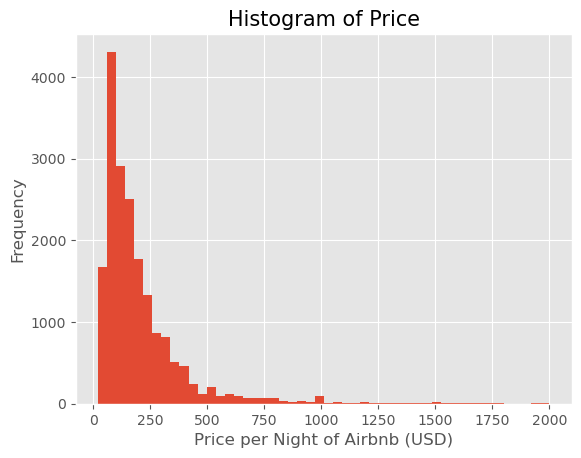

In [42]:
plt.hist((df['price']), bins = 50)
plt.xlabel('Price per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price', fontsize = 15)

Text(0.5, 1.0, 'Histogram of Log Price')

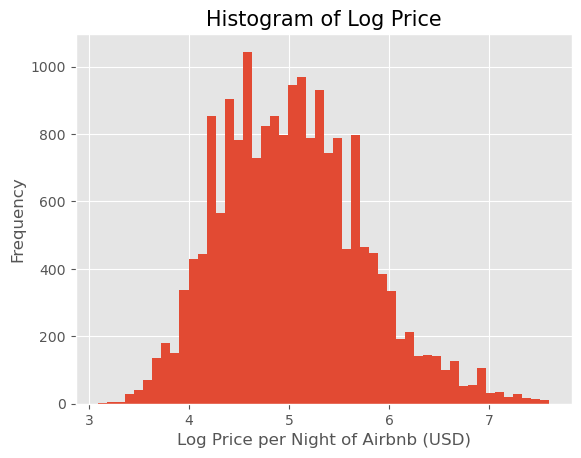

In [43]:
plt.hist((df['log_price']), bins = 50)
plt.xlabel('Log Price per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Price', fontsize = 15)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

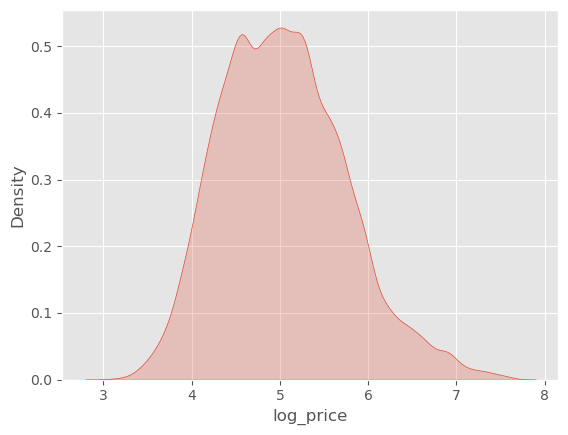

In [44]:
sns.kdeplot(df['log_price'], fill = True, label = 'Estimated PDF of Log Price')

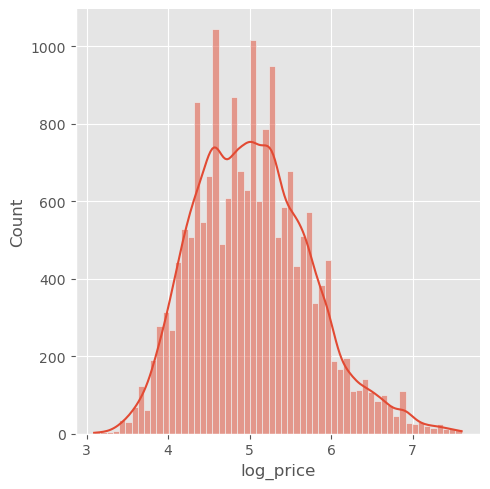

In [45]:
sns.displot((df['log_price']), kde=True)

Text(0.5, 1.0, 'Histogram of Price per Stay (pps)')

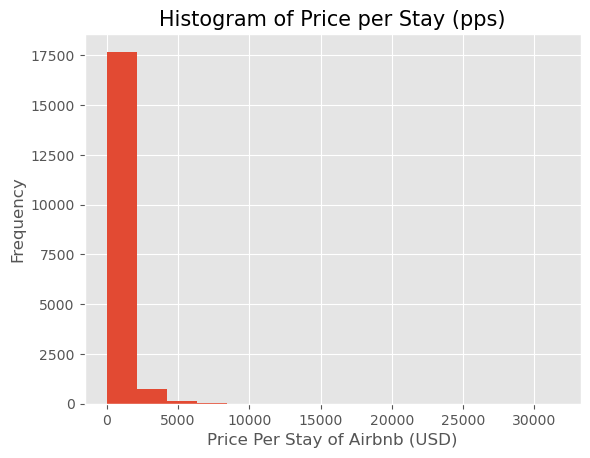

In [48]:
plt.hist((df['pps']), bins = 15)
plt.xlabel('Price Per Stay of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Stay (pps)', fontsize = 15)

In [31]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,log_pps,log_price,is_budget,is_luxury
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775,8.661294,5.616771,0,1
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150,5.010635,4.317488,1,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,1800,7.495542,4.094345,0,1
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136,4.912655,4.219508,1,0
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5250,8.565983,5.164786,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41066,769046532467871799,Entire 3 bedroom apt - Sunnyside,188096291,Queens,Sunnyside,Entire home/apt,130,1,1,1.00,1,355,1,130,4.867534,4.867534,1,0
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99,4.595120,4.595120,1,0
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91,4.510860,4.510860,1,0
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145,4.976734,4.976734,1,0


<AxesSubplot:xlabel='pps', ylabel='price'>

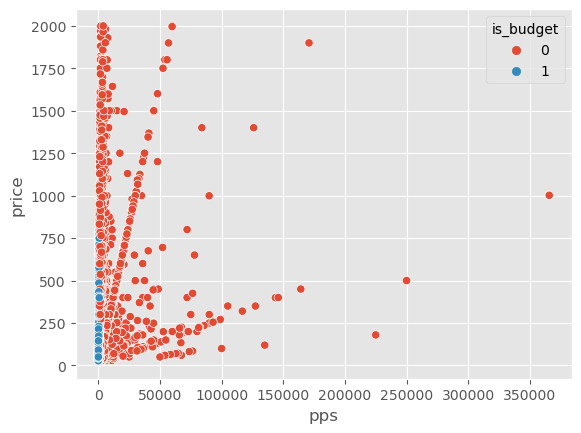

In [34]:
sns.scatterplot(data = df, x = 'pps', y = 'price', hue='is_budget')

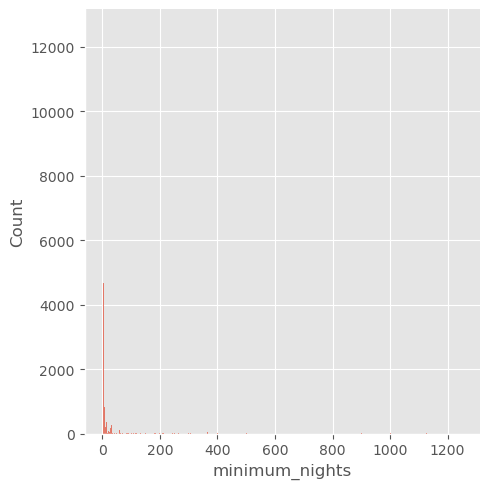

In [39]:
sns.displot(df['minimum_nights'])

In [21]:
def get_outlier_bounds(col_name):
    '''
    Gets the bound for outliers in the dataset. This is to make the visualizations easier. This function is 
    specifically for this usage and dataset
     
    Param:
        col_name: the name of the column for which you want the bounds. Must be a numerical column
    Return:
        A tuple with the col_name, upper_bound and lower_bound
    '''
    iqr = describe_df.loc['75%',col_name] - describe_df.loc['25%',col_name]
    upper_bound = describe_df.loc['75%',col_name] + (1.5* iqr)
    lower_bound = describe_df.loc['25%',col_name] - (1.5*iqr)
    print(col_name)
    print('upper bound ' + upper_bound.astype(str))
    print('lower bound ' + lower_bound.astype(str))
    print('-'*50)
    return (col_name,upper_bound,lower_bound)

In [22]:
# filtering out the outliers
# We only want the numeric columns because the get_outlier_bounds won't work on strings
numeric_cols = listingsNYC.select_dtypes(include=np.number)
for column in numeric_cols.columns:
    listingsNYC = listingsNYC[(listingsNYC[column] < get_outlier_bounds(column)[1]) & (listingsNYC[column] > get_outlier_bounds(column)[2])]
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ppn
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,13.10
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,2.00
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5.83
5,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Manhattan,East Harlem,Private room,65,30,1,0.16,2,300,1,2.17
11,7801,Sweet and Spacious Brooklyn Loft,21207,Brooklyn,Williamsburg,Entire home/apt,395,30,9,0.06,1,332,0,13.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41036,768899741442488288,this is studio apartment,488754388,Queens,Glendale,Entire home/apt,106,1,1,1.00,1,346,1,106.00
41056,768239303625460600,Apartment in Corona Queens,105692628,Queens,Jackson Heights,Entire home/apt,140,1,1,1.00,1,350,1,140.00
41066,769046532467871799,Entire 3 bedroom apt - Sunnyside,188096291,Queens,Sunnyside,Entire home/apt,130,1,1,1.00,1,355,1,130.00
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145.00
